# Content:
6.1. What is a Category data type? \
6.2. Working with JointPlots \
6.3. Histograms\
6.4. Stacked histograms in Python \
6.5. Creating a KDE Plot \
6.6. Working with subplots() \
6.7. Violinplots vs Boxplots \
6.8. Creating a Facet Grid \
6.9. Coordinates and Diagonals \
6.10. BONUS: Building Dashboards in Python \
6.11. BONUS: Styling Tips\
6.12. BONUS: Finishing Touches \

---

# 6.1 What is a Category data type?

In [1]:
#numeric and categorical data, this chapter: Categorical data

In [ ]:
#preparing data

In [2]:
import pandas as pd
import os

In [4]:
os.getcwd()

'C:\\Users\\Cristhian\\Desktop\\Mater_Thesis_prep\\1_Python4DS'

In [5]:
os.chdir('./docs/')

In [6]:
os.getcwd()

'C:\\Users\\Cristhian\\Desktop\\Mater_Thesis_prep\\1_Python4DS\\docs'

In [7]:
movies =pd.read_csv('./P4-Movie-Ratings.csv')

In [11]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [12]:
len(movies)

559

In [14]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [71]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillion', 'Year']

In [72]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [73]:
movies.info()
#Genre and year are recognized as integer (but are those really numbers?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillion   559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [74]:
movies.describe()
#There we see that the statistics does not make sense for Year
#Year and Genre should be treated as category instead of a number

,CriticRating,AudienceRating,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [75]:
#Turning it to a categorical variable
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')


In [76]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillion   559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [77]:
movies.Genre.cat.categories   #To check the categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [78]:
movies.describe()
#Python has learned that Year is a category and has not made stats for this variable

,CriticRating,AudienceRating,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

# 6.2. Working with JointPlots

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [80]:
#Jointplots

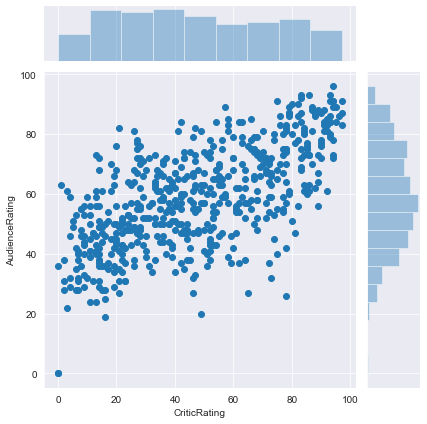

In [81]:
j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating")

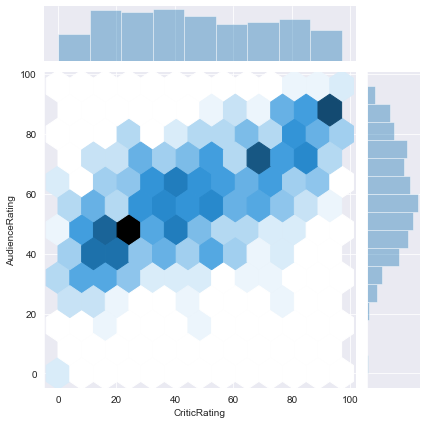

In [82]:
j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating",kind="hex" )
#j = sns.jointplot(data=movies, x="CriticRating", y="CriticRating",kind="hex" )   #Trail
#to see much better the clusters

---

# 6.3. Histograms

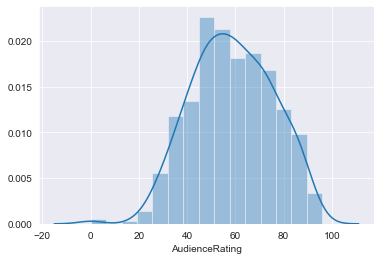

In [83]:
#already know this method:
m1 = sns.distplot(movies.AudienceRating, bins=15)

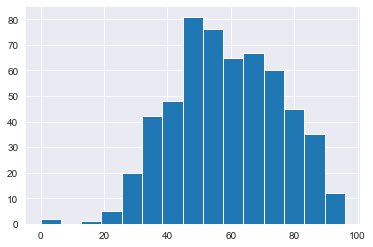

In [84]:
#sns.set_style('white')
#To return to dark grid:  
sns.set_style('darkgrid')
n1 = plt.hist(movies.AudienceRating, bins=15)

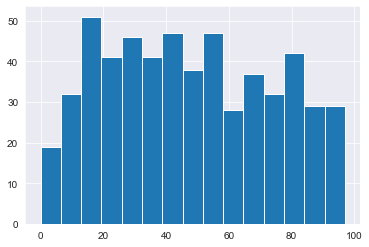

In [85]:
n2 = plt.hist(movies.CriticRating, bins=15)

---

# 6.4. Stacked histograms in Python

In [93]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

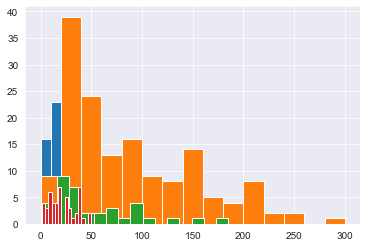

In [95]:
#movies[movies.Genre == 'Drama'].BudgetMillion
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre == 'Horror'].BudgetMillion, bins=15)
plt.show()
#it plots all in the same

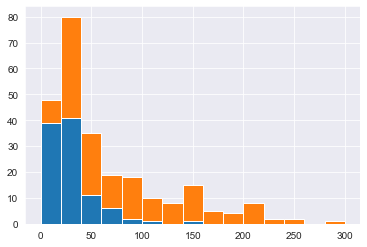

In [100]:
#but the bins are overlapping and we can see it properly
# we have to pass it in a list for all the categories
#[movies[movies.Genre == 'Drama'].BudgetMillion, movies[movies.Genre == 'Action'].BudgetMillion]
h5 = plt.hist([movies[movies.Genre == 'Drama'].BudgetMillion, movies[movies.Genre == 'Action'].BudgetMillion], bins=15, stacked=True)
plt.show()

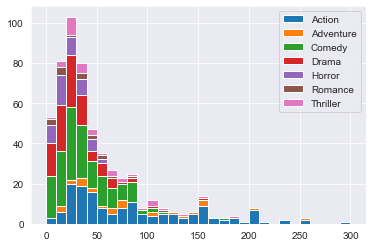

In [111]:
#but I need to make the series of list for 6 categories
#I can do it manually but  what if we have  100 categories? 
#Let's do it with loops
list1 = [] #empty list
mylabels = list() # for the labels/lagend
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillion)
    mylabels.append(gen)
#h = plt.hist(list1, bins = 30, stacked=True)
#h = plt.hist(list1, bins = 30, stacked=True, rwidth=1) #for gaps
h = plt.hist(list1, bins = 30, stacked=True, rwidth=1, label=mylabels) #for labels (also needed to create an empty list of labels and append it from genre)
plt.legend()
plt.show()

---

# 6.5. Creating a Kernel Density Estimate (KDE) Plot

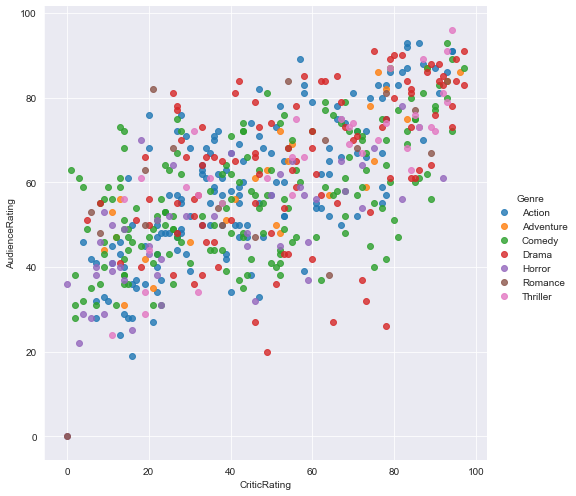

In [115]:
vis1 = sns.lmplot(data=movies, x="CriticRating", y="AudienceRating", \
                 fit_reg=False, hue='Genre', \
                 size=7, aspect=1)

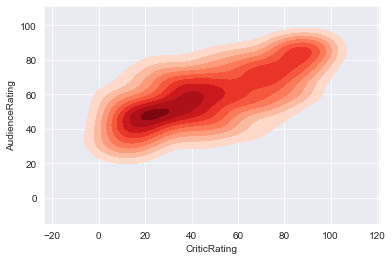

In [122]:
#KDE PLOT
#k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)
#k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True)
#k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False)
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap="Reds")
#as going out of the center of the kernel the density is lower

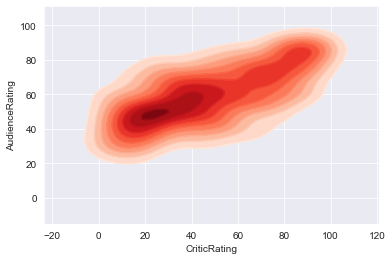

In [124]:
#Tip
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap="Reds")
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,cmap="Reds")
#looks more professional

---

# 6.6. Working with subplots()

In [125]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

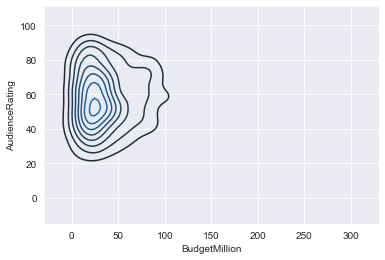

In [129]:
sns.set_style('darkgrid')
k2 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating)